In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data = pd.read_csv('battle_stats_combined.csv')
##standard import of data gathered in other file

In [3]:
df = data.copy()

In [5]:
df.head()

,Unnamed: 0,First_pokemon,Second_pokemon,Winner,0_#,0_Name,0_Type 1,0_Type 2,0_HP,0_Attack,...,1_Type 1,1_Type 2,1_HP,1_Attack,1_Defense,1_Sp. Atk,1_Sp. Def,1_Speed,1_Generation,1_Legendary
0,0,266,298,298,266,Larvitar,Rock,Ground,50,64,...,Grass,Dark,70,70,40,60,40,60,3,False
1,1,73,298,298,73,Machop,Fighting,NaN,70,80,...,Grass,Dark,70,70,40,60,40,60,3,False
2,2,373,298,298,373,Whiscash,Water,Ground,110,78,...,Grass,Dark,70,70,40,60,40,60,3,False
3,3,536,298,536,536,Fan Rotom,Electric,Flying,50,65,...,Grass,Dark,70,70,40,60,40,60,3,False
4,4,368,298,368,368,Zangoose,Normal,NaN,73,115,...,Grass,Dark,70,70,40,60,40,60,3,False


In [4]:
##need to create binary variable determining whether the first or second pokemon won the battle
def winner(first, winner):
    if first == winner:
        return 1
    else:
        return 0
##function above to perform this task

In [5]:
df['first_winner?'] = df.apply(lambda x: winner(x.First_pokemon, x.Winner), axis=1)
##applying above function

In [13]:
df.head()
##0_# and 1_# are needless dplicates of first_pokemon and second_pokemon

,Unnamed: 0,First_pokemon,Second_pokemon,Winner,0_#,0_Name,0_Type 1,0_Type 2,0_HP,0_Attack,...,1_Type 2,1_HP,1_Attack,1_Defense,1_Sp. Atk,1_Sp. Def,1_Speed,1_Generation,1_Legendary,first_winner?
0,0,266,298,298,266,Larvitar,Rock,Ground,50,64,...,Dark,70,70,40,60,40,60,3,False,0
1,1,73,298,298,73,Machop,Fighting,NaN,70,80,...,Dark,70,70,40,60,40,60,3,False,0
2,2,373,298,298,373,Whiscash,Water,Ground,110,78,...,Dark,70,70,40,60,40,60,3,False,0
3,3,536,298,536,536,Fan Rotom,Electric,Flying,50,65,...,Dark,70,70,40,60,40,60,3,False,1
4,4,368,298,368,368,Zangoose,Normal,NaN,73,115,...,Dark,70,70,40,60,40,60,3,False,1


In [6]:
df.drop(columns=['0_#', '1_#'], inplace=True)
##dropping offending columns

In [15]:
df.head()
##unnamed:0 seemed to be another useless column

,Unnamed: 0,First_pokemon,Second_pokemon,Winner,0_Name,0_Type 1,0_Type 2,0_HP,0_Attack,0_Defense,...,1_Type 2,1_HP,1_Attack,1_Defense,1_Sp. Atk,1_Sp. Def,1_Speed,1_Generation,1_Legendary,first_winner?
0,0,266,298,298,Larvitar,Rock,Ground,50,64,50,...,Dark,70,70,40,60,40,60,3,False,0
1,1,73,298,298,Machop,Fighting,NaN,70,80,50,...,Dark,70,70,40,60,40,60,3,False,0
2,2,373,298,298,Whiscash,Water,Ground,110,78,73,...,Dark,70,70,40,60,40,60,3,False,0
3,3,536,298,536,Fan Rotom,Electric,Flying,50,65,107,...,Dark,70,70,40,60,40,60,3,False,1
4,4,368,298,368,Zangoose,Normal,NaN,73,115,60,...,Dark,70,70,40,60,40,60,3,False,1


In [7]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [9]:
df.head(500)

,First_pokemon,Second_pokemon,Winner,0_Name,0_Type 1,0_Type 2,0_HP,0_Attack,0_Defense,0_Sp. Atk,...,1_Type 2,1_HP,1_Attack,1_Defense,1_Sp. Atk,1_Sp. Def,1_Speed,1_Generation,1_Legendary,first_winner?
0,266,298,298,Larvitar,Rock,Ground,50,64,50,45,...,Dark,70,70,40,60,40,60,3,False,0
1,73,298,298,Machop,Fighting,NaN,70,80,50,35,...,Dark,70,70,40,60,40,60,3,False,0
2,373,298,298,Whiscash,Water,Ground,110,78,73,76,...,Dark,70,70,40,60,40,60,3,False,0
3,536,298,536,Fan Rotom,Electric,Flying,50,65,107,105,...,Dark,70,70,40,60,40,60,3,False,1
4,368,298,368,Zangoose,Normal,NaN,73,115,60,60,...,Dark,70,70,40,60,40,60,3,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,297,123,123,Seedot,Grass,NaN,40,40,50,30,...,NaN,65,55,115,100,40,60,1,False,0
496,280,123,280,Mega Blaziken,Fire,Fighting,80,160,80,130,...,NaN,65,55,115,100,40,60,1,False,1
497,713,123,713,Kyurem White Kyurem,Dragon,Ice,125,120,90,170,...,NaN,65,55,115,100,40,60,1,False,1
498,693,123,693,Heatmor,Fire,NaN,85,97,66,105,...,NaN,65,55,115,100,40,60,1,False,1


In [11]:
df.dtypes
##only types which could do with changing are converting the boolean values of 0/1_legendary to binary such that they can be used in modelling

First_pokemon      int64
Second_pokemon     int64
Winner             int64
0_Name            object
0_Type 1          object
0_Type 2          object
0_HP               int64
0_Attack           int64
0_Defense          int64
0_Sp. Atk          int64
0_Sp. Def          int64
0_Speed            int64
0_Generation       int64
0_Legendary         bool
1_Name            object
1_Type 1          object
1_Type 2          object
1_HP               int64
1_Attack           int64
1_Defense          int64
1_Sp. Atk          int64
1_Sp. Def          int64
1_Speed            int64
1_Generation       int64
1_Legendary         bool
first_winner?      int64
dtype: object

In [8]:
df['0_Legendary'] = df['0_Legendary'].map({False: 0, True:1})
df['1_Legendary'] = df['1_Legendary'].map({False: 0, True:1})
##performing mapping as detailed above

In [21]:
df.head()

,First_pokemon,Second_pokemon,Winner,0_Name,0_Type 1,0_Type 2,0_HP,0_Attack,0_Defense,0_Sp. Atk,...,1_Type 2,1_HP,1_Attack,1_Defense,1_Sp. Atk,1_Sp. Def,1_Speed,1_Generation,1_Legendary,first_winner?
0,266,298,298,Larvitar,Rock,Ground,50,64,50,45,...,Dark,70,70,40,60,40,60,3,0,0
1,73,298,298,Machop,Fighting,NaN,70,80,50,35,...,Dark,70,70,40,60,40,60,3,0,0
2,373,298,298,Whiscash,Water,Ground,110,78,73,76,...,Dark,70,70,40,60,40,60,3,0,0
3,536,298,536,Fan Rotom,Electric,Flying,50,65,107,105,...,Dark,70,70,40,60,40,60,3,0,1
4,368,298,368,Zangoose,Normal,NaN,73,115,60,60,...,Dark,70,70,40,60,40,60,3,0,1


In [13]:
df[['0_Legendary', '1_Legendary']].dtypes
##verifying it has worked as expected

0_Legendary    float64
1_Legendary    float64
dtype: object

In [27]:
df.isna().sum()
##lots of nulls in type_2 is exptected -- these are not missing entries but simply cases where a pokemon does not have a second type
##can fill these instancdes with 'no' or similar.

##nulls found in the name columns need to be investigated

First_pokemon         0
Second_pokemon        0
Winner                0
0_Name               56
0_Type 1              0
0_Type 2          24031
0_HP                  0
0_Attack              0
0_Defense             0
0_Sp. Atk             0
0_Sp. Def             0
0_Speed               0
0_Generation          0
0_Legendary           0
1_Name               52
1_Type 1              0
1_Type 2          23985
1_HP                  0
1_Attack              0
1_Defense             0
1_Sp. Atk             0
1_Sp. Def             0
1_Speed               0
1_Generation          0
1_Legendary           0
first_winner?         0
dtype: int64

In [ ]:
df[df['0_Name'].isna()].First_pokemon.unique()

In [ ]:
df[df['1_Name'].isna()].Second_pokemon.unique()
##every single one of these nulls is pokemon number 63

In [13]:
pokemon = pd.read_csv('pokemon.csv')
##reading in pokemon database to see if this is where the null came from

In [ ]:
pokemon[61:65]
##the placement of the null between mankey and growlithe suggests that this pokemon is primeape.
##a quick look on the serebii generation 1 pokedex (https://www.serebii.net/pokemon/gen1pokemon.shtml) allows us
##to see that primeape shares all the statistics with those seen in the null row

In [ ]:
pokemon[pokemon['Name'] == 'Primeape']
##we can also see that no other pokemon have this name, hence it must be the pokemon missing from the database and we can confiddently replcae these nulls

In [9]:
df['0_Name'].fillna('Primeape', inplace=True)
df['1_Name'].fillna('Primeape', inplace=True)
##fulling nulls as described above

In [ ]:
df.isna().sum()
##only remaining nulls are the pokemon with only one type (will deal with later)

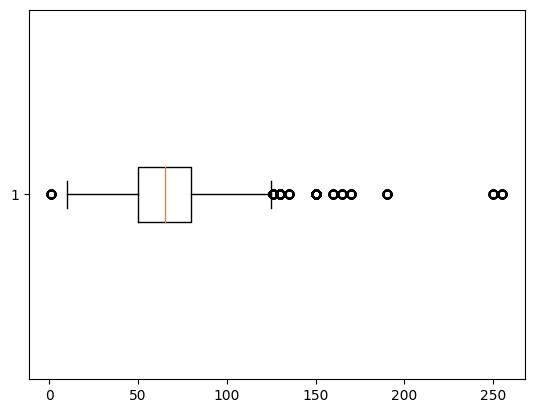

In [44]:
##checking for outliers
plt.boxplot(df['0_HP'], vert=False)
plt.show()

In [46]:
df[df['0_HP'] > 200]
##these outliers seem to consist of pokemon which legitemately have very high HP values, so will remain.

,First_pokemon,Second_pokemon,Winner,0_Name,0_Type 1,0_Type 2,0_HP,0_Attack,0_Defense,0_Sp. Atk,...,1_Type 2,1_HP,1_Attack,1_Defense,1_Sp. Atk,1_Sp. Def,1_Speed,1_Generation,1_Legendary,first_winner?
611,122,279,279,Chansey,Normal,NaN,250,5,5,35,...,Fighting,80,120,70,110,70,80,3,0,0
1040,262,426,426,Blissey,Normal,NaN,255,10,10,75,...,Flying,105,150,90,150,90,95,3,1,0
1759,262,196,196,Blissey,Normal,NaN,255,10,10,75,...,NaN,90,75,85,115,90,55,2,0,0
2395,262,284,284,Blissey,Normal,NaN,255,10,10,75,...,Ground,100,150,110,95,110,70,3,0,0
3158,262,746,746,Blissey,Normal,NaN,255,10,10,75,...,NaN,62,48,54,63,60,68,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48755,262,210,210,Blissey,Normal,NaN,255,10,10,75,...,Ground,55,45,45,25,25,15,2,0,0
49449,262,80,80,Blissey,Normal,NaN,255,10,10,75,...,Poison,80,70,65,80,120,100,1,0,0
49587,262,3,3,Blissey,Normal,NaN,255,10,10,75,...,Poison,80,82,83,100,100,80,1,0,0
49904,122,62,62,Chansey,Normal,NaN,250,5,5,35,...,NaN,40,80,35,35,45,70,1,0,0


In [ ]:
plt.boxplot(df['0_Attack'], vert=False)
plt.show()
##very minimal outliers here and not particularly notable ones either

In [ ]:
plt.boxplot(df['0_Defense'], vert=False)
plt.show()
##same as above

In [ ]:
plt.boxplot(df['0_Speed'], vert=False)
plt.show()
##same as above

In [ ]:
plt.boxplot(df['0_Sp. Atk'], vert=False)
plt.show()
##same as above

In [ ]:
plt.boxplot(df['0_Sp. Def'], vert=False)
plt.show()
##same as above

##not removing any outliers as the only ones whith any kind of chance of skewing the dataset came from pokemon with legitemately high HP values.

In [ ]:
##exploring just the pokemon themselves for now

In [ ]:
pokemon.head()

In [14]:
pokemon['Name'].fillna('Primeape', inplace=True)
##filling null as discussed above

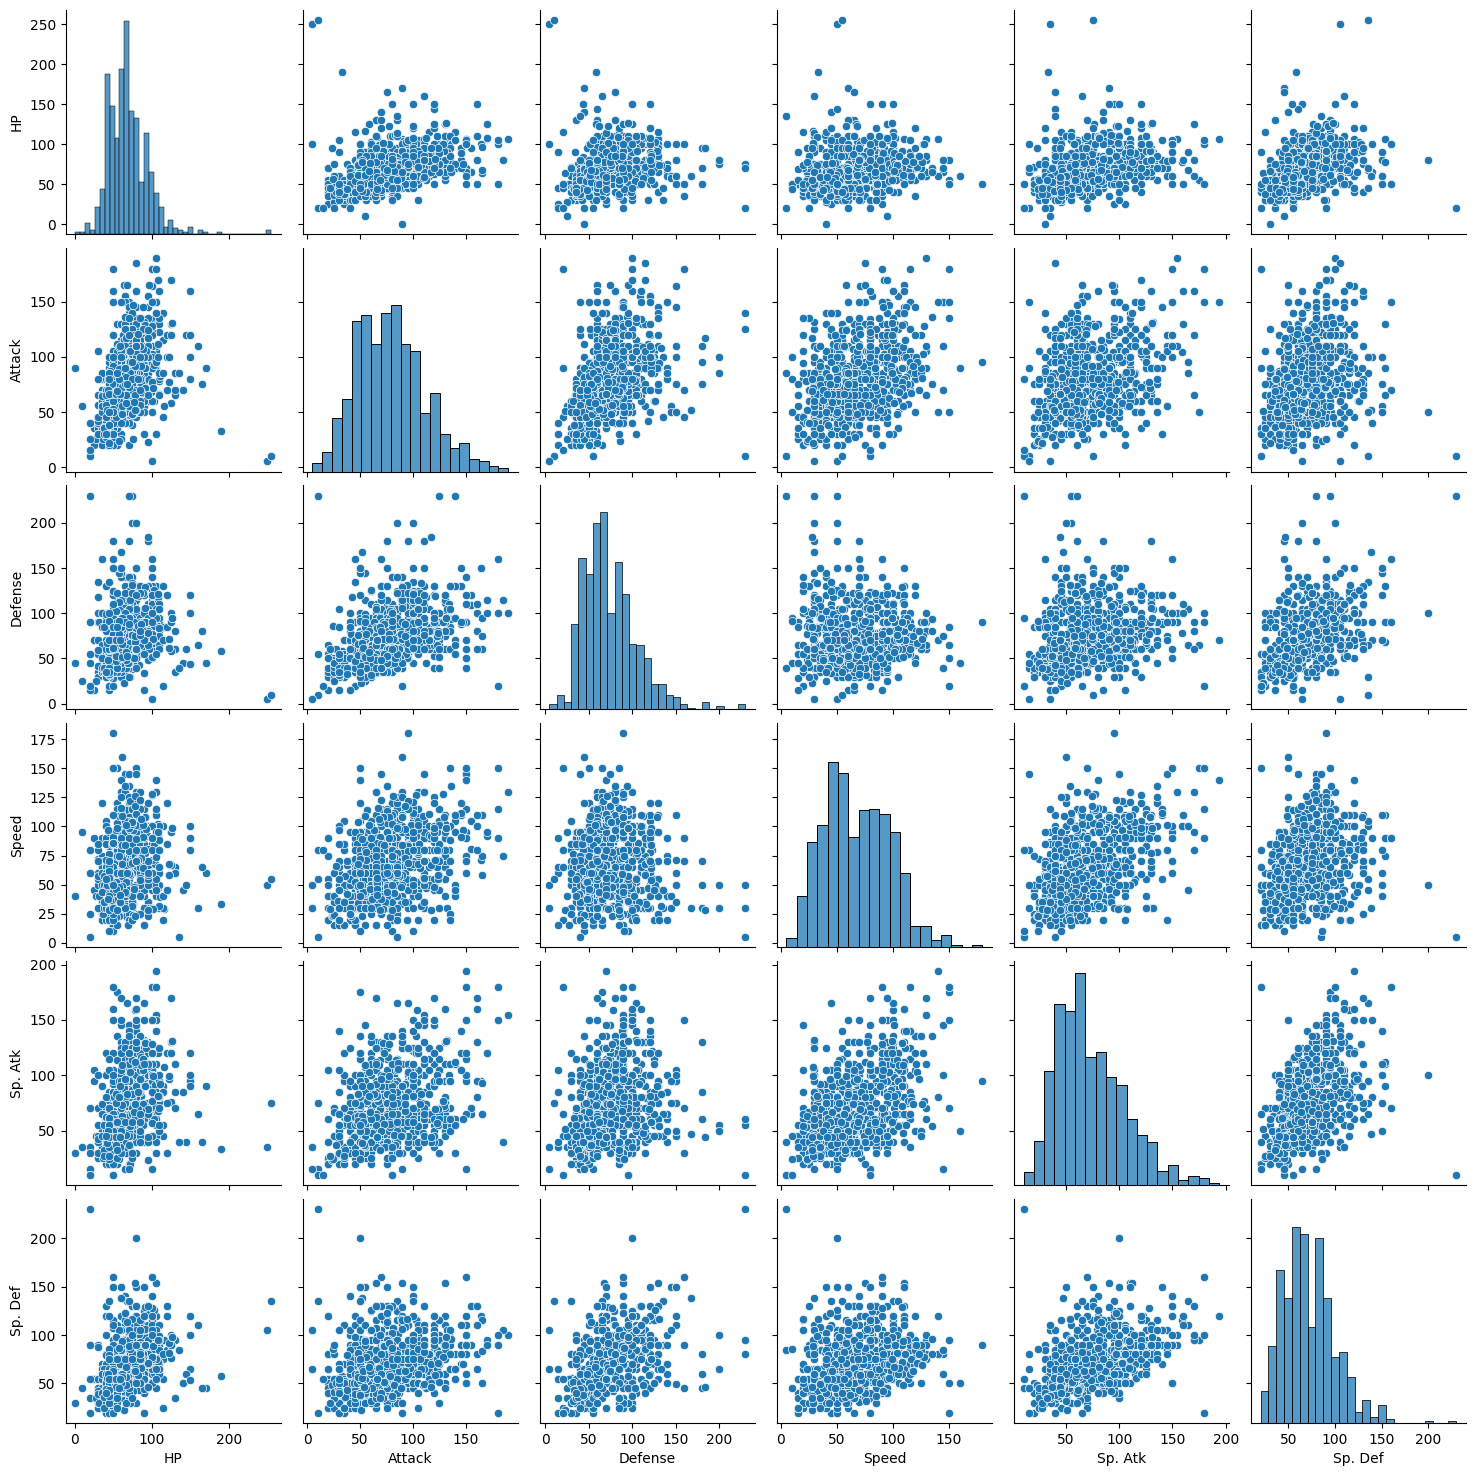

In [63]:
sns.pairplot(pokemon[['HP', 'Attack', 'Defense', 'Speed', 'Sp. Atk', 'Sp. Def']])

In [ ]:
##the individual statistics seem to be (relatively) normall in nature across the board, with a little skewing to the left in most
##as for the relationships between statsitics, there do not seem to be any obvious relationships, will however investigate this further via correlation
##heatmaps.

/var/folders/v5/pdqc14wn18q_mnmpjb8n8d9r0000gn/T/ipykernel_27751/2081926942.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(pokemon.corr(), annot=True, cmap="YlGnBu")


<AxesSubplot: >

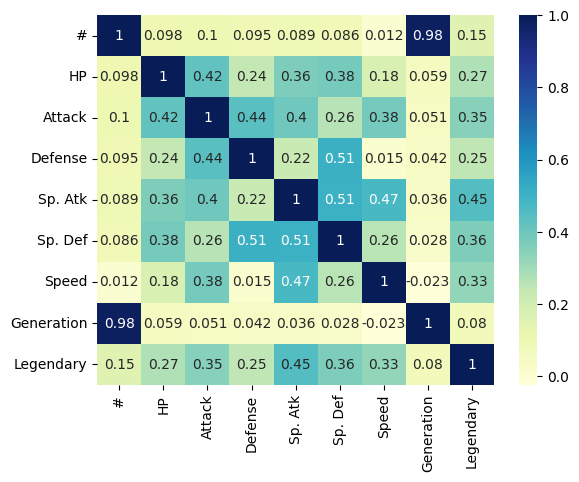

In [64]:
sns.heatmap(pokemon.corr(), annot=True, cmap="YlGnBu")

In [ ]:
##correlation between number and generation is not suprising given the nature of the pokedex.
#decent correlation between defence & special defence is not suprising
#speed and special attack is interesting, perhaps quicker pokemon are more suited to special attacks than physical ones?
#attack and defense is interesting, perhaps generally when a pokemon is stronger in attack it is likely to also be stronger in defence?

## Visualisation

In [65]:
##radar plots attempt

In [86]:
pokemon.describe().mean()

#             429.260550
HP            168.224177
Attack        167.057327
Defense       168.753250
Sp. Atk       164.911537
Sp. Def       169.966427
Speed         160.292247
Generation    102.748130
dtype: float64

In [115]:
pokemon.groupby('Type 1').describe()

#                                                               \
          count        mean         std    min     25%    50%     75%    max   
Type 1                                                                         
Bug        69.0  369.072464  233.023245   14.0  183.00  316.0  604.00  735.0   
Dark       31.0  508.387097  195.966949  213.0  306.50  569.0  689.00  794.0   
Dragon     32.0  522.843750  187.847761  160.0  409.75  492.5  707.25  795.0   
Electric   44.0  401.590909  224.885327   31.0  194.75  449.5  548.25  773.0   
Fairy      17.0  495.529412  300.912802   41.0  191.00  738.0  754.00  793.0   
Fighting   27.0  401.444444  242.459090   62.0  186.00  337.0  597.00  772.0   
Fire       52.0  361.942308  251.218553    5.0  156.25  316.5  573.25  800.0   
Flying      4.0  747.500000   50.810104  703.0  703.75  747.5  791.25  792.0   
Ghost      32.0  537.281250  231.589352  100.0  388.75  545.5  780.25  788.0   
Grass      70.0  381.414286  222.871022    1.0  203.25  412.0  556.75  742.0   
Ground     32.0  393.312500  226.810627   33.0  197.50  400.5  595.50  710.0   
Ice        24.0  466.666667  195.535978  134.0  361.50  408.5  645.25  790.0   
Normal     98.0  352.581633  215.301751   21.0  176.25  321.5  539.50  745.0   
Poison     28.0  279.285714  252.687167   29.0   39.75  151.5  502.25  762.0   
Psychic    57.0  421.105263  217.005570   69.0  217.00  431.0  588.00  799.0   
Rock       44.0  432.840909  237.258758   81.0  249.75  398.0  628.25  797.0   
Steel      27.0  487.296296  183.361731  224.0  332.50  417.0  662.50  778.0   
Water     112.0  334.312500  209.708680   10.0  141.75  299.0  507.25  764.0   

             HP             ...   Speed        Generation                      \
          count       mean  ...     75%    max      count      mean       std   
Type 1                      ...                                                 
Bug        69.0  56.884058  ...   85.00  160.0       69.0  3.217391  1.598433   
Dark       31.0  66.806452  ...   98.50  125.0       31.0  4.032258  1.353609   
Dragon     32.0  83.312500  ...   97.75  120.0       32.0  3.875000  1.431219   
Electric   44.0  59.795455  ...  101.50  140.0       44.0  3.272727  1.604697   
Fairy      17.0  74.117647  ...   60.00   99.0       17.0  4.117647  2.147160   
Fighting   27.0  69.851852  ...   86.00  118.0       27.0  3.370370  1.800601   
Fire       52.0  69.903846  ...   96.25  126.0       52.0  3.211538  1.850665   
Flying      4.0  70.750000  ...  121.50  123.0        4.0  5.500000  0.577350   
Ghost      32.0  64.437500  ...   84.25  130.0       32.0  4.187500  1.693203   
Grass      70.0  67.271429  ...   80.00  145.0       70.0  3.357143  1.579173   
Ground     32.0  73.781250  ...   90.00  120.0       32.0  3.156250  1.588454   
Ice        24.0  72.000000  ...   80.00  110.0       24.0  3.541667  1.473805   
Normal     98.0  77.275510  ...   90.75  135.0       98.0  3.051020  1.575407   
Poison     28.0  67.250000  ...   77.00  130.0       28.0  2.535714  1.752927   
Psychic    57.0  70.631579  ...  104.00  180.0       57.0  3.385965  1.644845   
Rock       44.0  65.363636  ...   70.00  150.0       44.0  3.454545  1.848375   
Steel      27.0  65.222222  ...   70.00  110.0       27.0  3.851852  1.350319   
Water     112.0  72.062500  ...   82.00  122.0      112.0  2.857143  1.558800   

                                     
          min   25%  50%   75%  max  
Type 1                               
Bug       1.0  2.00  3.0  5.00  6.0  
Dark      2.0  3.00  5.0  5.00  6.0  
Dragon    1.0  3.00  4.0  5.00  6.0  
Electric  1.0  2.00  4.0  4.25  6.0  
Fairy     1.0  2.00  6.0  6.00  6.0  
Fighting  1.0  1.50  3.0  5.00  6.0  
Fire      1.0  1.00  3.0  5.00  6.0  
Flying    5.0  5.00  5.5  6.00  6.0  
Ghost     1.0  3.00  4.0  6.00  6.0  
Grass     1.0  2.00  3.5  5.00  6.0  
Ground    1.0  1.75  3.0  5.00  5.0  
Ice       1.0  2.75  3.0  5.00  6.0  
Normal    1.0  2.00  3.0  4.00  6.0  
Poison    1.0  1.00  1.

In [151]:
pokemon[['HP', 'Attack', 'Defense','Speed', 'Sp. Atk', 'Sp. Def']][pokemon['Type 1'] == 'Water'].mean()

HP         72.062500
Attack     74.151786
Defense    72.946429
Speed      65.964286
Sp. Atk    74.812500
Sp. Def    70.517857
dtype: float64

In [ ]:
####
####
####

In [15]:
def radar(type, colour):

    # Plots a radar chart.

    from math import pi
    import matplotlib.pyplot as plt


    # Set data
    cat = ['HP', 'Attack', 'Defense', 'Speed', 'Sp.Atk', 'Sp.Def']
    values = []
    for i in range(len(pokemon[['HP', 'Attack', 'Defense','Speed', 'Sp. Atk', 'Sp. Def']][pokemon['Type 1'] == str(type)].mean())):
        values.append(pokemon[['HP', 'Attack', 'Defense','Speed', 'Sp. Atk', 'Sp. Def']][pokemon['Type 1'] == str(type)].mean()[i])

    N = len(cat)

    x_as = [n / float(N) * 2 * pi for n in range(N)]

    # Because our chart will be circular we need to append a copy of the first
    # value of each list at the end of each list with data
    values += values[:1]
    x_as += x_as[:1]


    # Set color of axes
    plt.rc('axes', linewidth=0.5, edgecolor="#888888")


    # Create polar plot
    ax = plt.subplot(111, polar=True)


    # Set clockwise rotation. That is:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)


    # Set position of y-labels
    ax.set_rlabel_position(0)


    # Set color and linestyle of grid
    ax.xaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)
    ax.yaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)


    # Set number of radial axes and remove labels
    plt.xticks(x_as[:-1], [])

    # Set yticks
    plt.yticks([25, 50, 75, 100, 125], ["25", "50", "75", "100", "125"])


    # Plot data
    ax.plot(x_as, values, linewidth=0, linestyle='solid', zorder=3)

    # Fill area
    ax.fill(x_as, values, c=colour, alpha=0.9)


    # Set axes limits
    plt.ylim(0, 125)


    # Draw ytick labels to make sure they fit properly
    for i in range(N):
        angle_rad = i / float(N) * 2 * pi

        if angle_rad == 0:
            ha, distance_ax = "center", 10
        elif 0 < angle_rad < pi:
            ha, distance_ax = "left", 1
        elif angle_rad == pi:
            ha, distance_ax = "center", 1
        else:
            ha, distance_ax = "right", 1

        ax.text(angle_rad, 100 + distance_ax, cat[i], size=10, horizontalalignment=ha, verticalalignment="center")


    # Show polar plot
    plt.title(str(type), y=1.05)
    plt.show()

In [206]:
pokemon['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

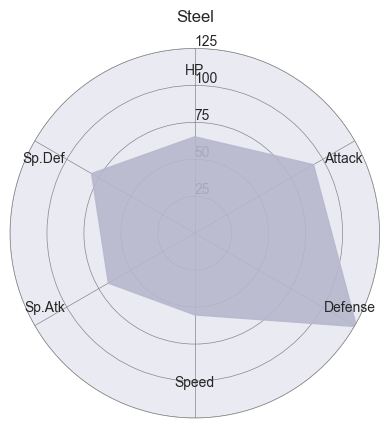

In [16]:
#radar('Dragon',  '#6F35FC')
#radar('Water', '#6390F0')
#radar('Fire', '#EE8130')
radar('Steel', '#B7B7CE')
#radar('Grass', '#7AC74C')
#radar('Bug', '#A6B91A')
#radar('Normal', '#A8A77A')
#radar('Poison', '#A33EA1')
#radar('Electric', '#F7D02C')
#radar('Ground', '#E2BF65')
#radar('Fairy', '#D685AD')
#radar('Fighting', '#C22E28')
#radar('Psychic', '#F95587')
#radar('Rock', '#B6A136')
#radar('Ghost', '#735797')
#radar('Ice', '#96D9D6')
#radar('Dark', '#705746')
#radar('Flying', '#A98FF3')

##forming the radar plots for each pokemon type

In [ ]:
df.head()

In [121]:
#Difference in stats between winner and loser
def statdiff(stat_0, stat_1, first_winner):
    if first_winner == 1:
        return stat_0 - stat_1
    else:
        return stat_1 - stat_0

In [128]:
df['HP_diff'] = df.apply(lambda x: statdiff(x['0_HP'], x['1_HP'], x['first_winner?']), axis=1)
df['Attack_diff'] = df.apply(lambda x: statdiff(x['0_Attack'], x['1_Attack'], x['first_winner?']), axis=1)
df['Defense_diff'] = df.apply(lambda x: statdiff(x['0_Defense'], x['1_Defense'], x['first_winner?']), axis=1)
df['Speed_diff'] = df.apply(lambda x: statdiff(x['0_Speed'], x['1_Speed'], x['first_winner?']), axis=1)
df['SpAtk_diff'] = df.apply(lambda x: statdiff(x['0_Sp. Atk'], x['1_Sp. Atk'], x['first_winner?']), axis=1)
df['SpDef_diff'] = df.apply(lambda x: statdiff(x['0_Sp. Def'], x['1_Sp. Def'], x['first_winner?']), axis=1)
##applying difference in stats to all columns


In [130]:
diff_df = df[['HP_diff', 'Attack_diff', 'Defense_diff', 'Speed_diff', 'SpAtk_diff', 'SpDef_diff']].copy()
##turning this into its own dataframe for plotting purposes

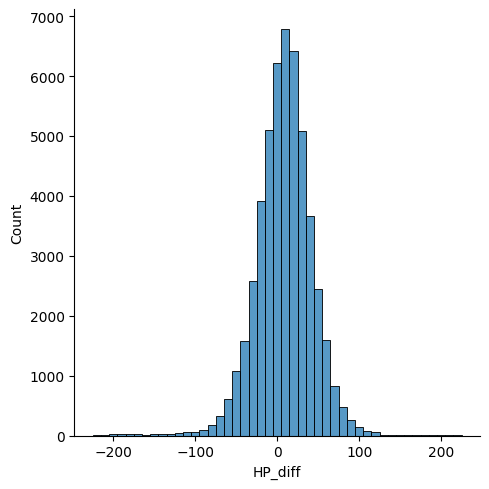

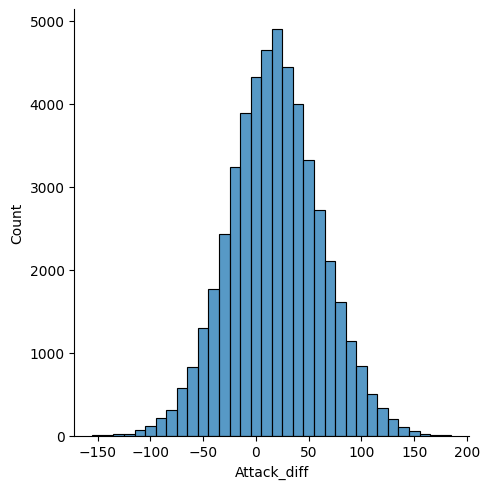

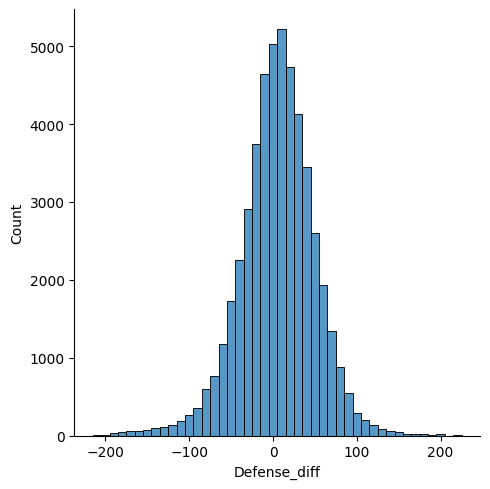

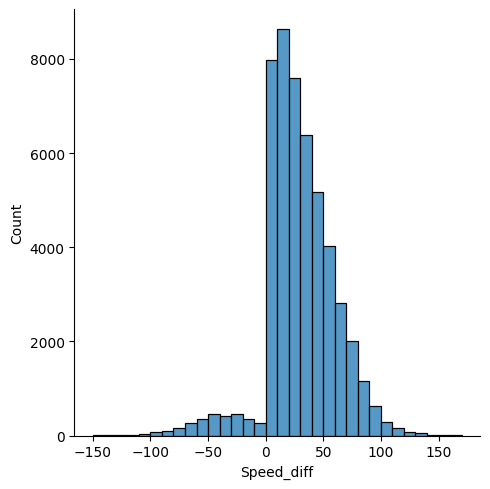

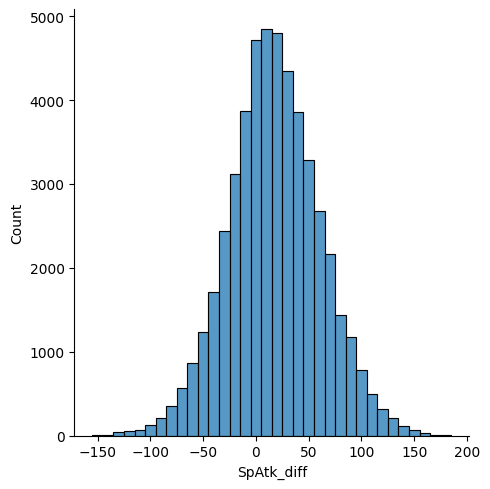

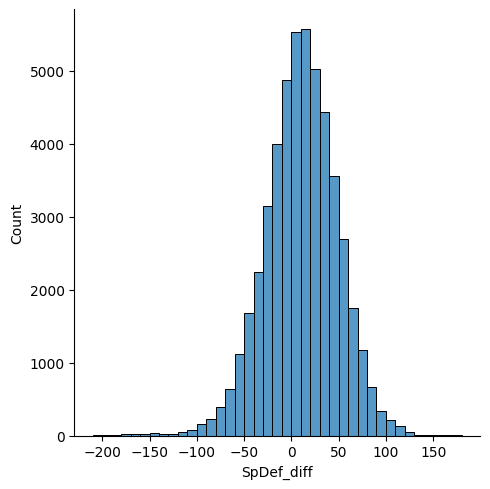

In [136]:
##distribution plots of differences in statistics between first and second pokemon
sns.displot(diff_df['HP_diff'], binwidth=10)
plt.show()
sns.displot(diff_df['Attack_diff'], binwidth=10)
plt.show()
sns.displot(diff_df['Defense_diff'], binwidth=10)
plt.show()
sns.displot(diff_df['Speed_diff'], binwidth=10)
plt.show()
sns.displot(diff_df['SpAtk_diff'], binwidth=10)
plt.show()
sns.displot(diff_df['SpDef_diff'], binwidth=10)
plt.show()
##most seem normal, with mean slightly above 0, except for speed which significantly has overwhelmingly majority positive values
##this suggests that speed is likely to be the most important factor when determining which pokemon is likely to win a 1 vs 1 battle.